**Importing Dependencies**

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection**

In [154]:
# Loading the dataset into a pandas dataframe
crop_df = pd.read_csv("yield_df.csv")

In [155]:
# Getting the first five rows of the dataset
crop_df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [156]:
# Getting the data for only Australia
print(crop_df[crop_df["Area"] == "Australia"])

      Unnamed: 0       Area  ... pesticides_tonnes  avg_temp
808          808  Australia  ...          17866.00     16.80
809          809  Australia  ...          17866.00     20.06
810          810  Australia  ...          17866.00     12.11
811          811  Australia  ...          17866.00     14.16
812          812  Australia  ...          17866.00     18.05
...          ...        ...  ...               ...       ...
1769        1769  Australia  ...          45177.18     20.14
1770        1770  Australia  ...          45177.18     12.19
1771        1771  Australia  ...          45177.18     14.74
1772        1772  Australia  ...          45177.18     19.98
1773        1773  Australia  ...          45177.18     18.09

[966 rows x 8 columns]


In [157]:
# Dropping unnecessary columns
crop_df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [158]:
# Printing updated dataset
crop_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [159]:
# Getting the dimension of the dataset
crop_df.shape

(28242, 7)

In [160]:
# Getting some info about the dataset
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [161]:
# Checking for null values
crop_df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [162]:
# Checking for duplicate rows
crop_df.duplicated().sum()

2310

In [163]:
# Dropping all duplicate values
crop_df.drop_duplicates(inplace=True)

In [164]:
# Checking the dimension of the updated dataset
crop_df.shape

(25932, 7)

In [165]:
# Statistical measures of the data
crop_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [166]:
crop_df["average_rain_fall_mm_per_year"].dtype

dtype('float64')

**Data Visualization**

**Question 1: What is the Area distribution?**

<Axes: xlabel='count', ylabel='Area'>

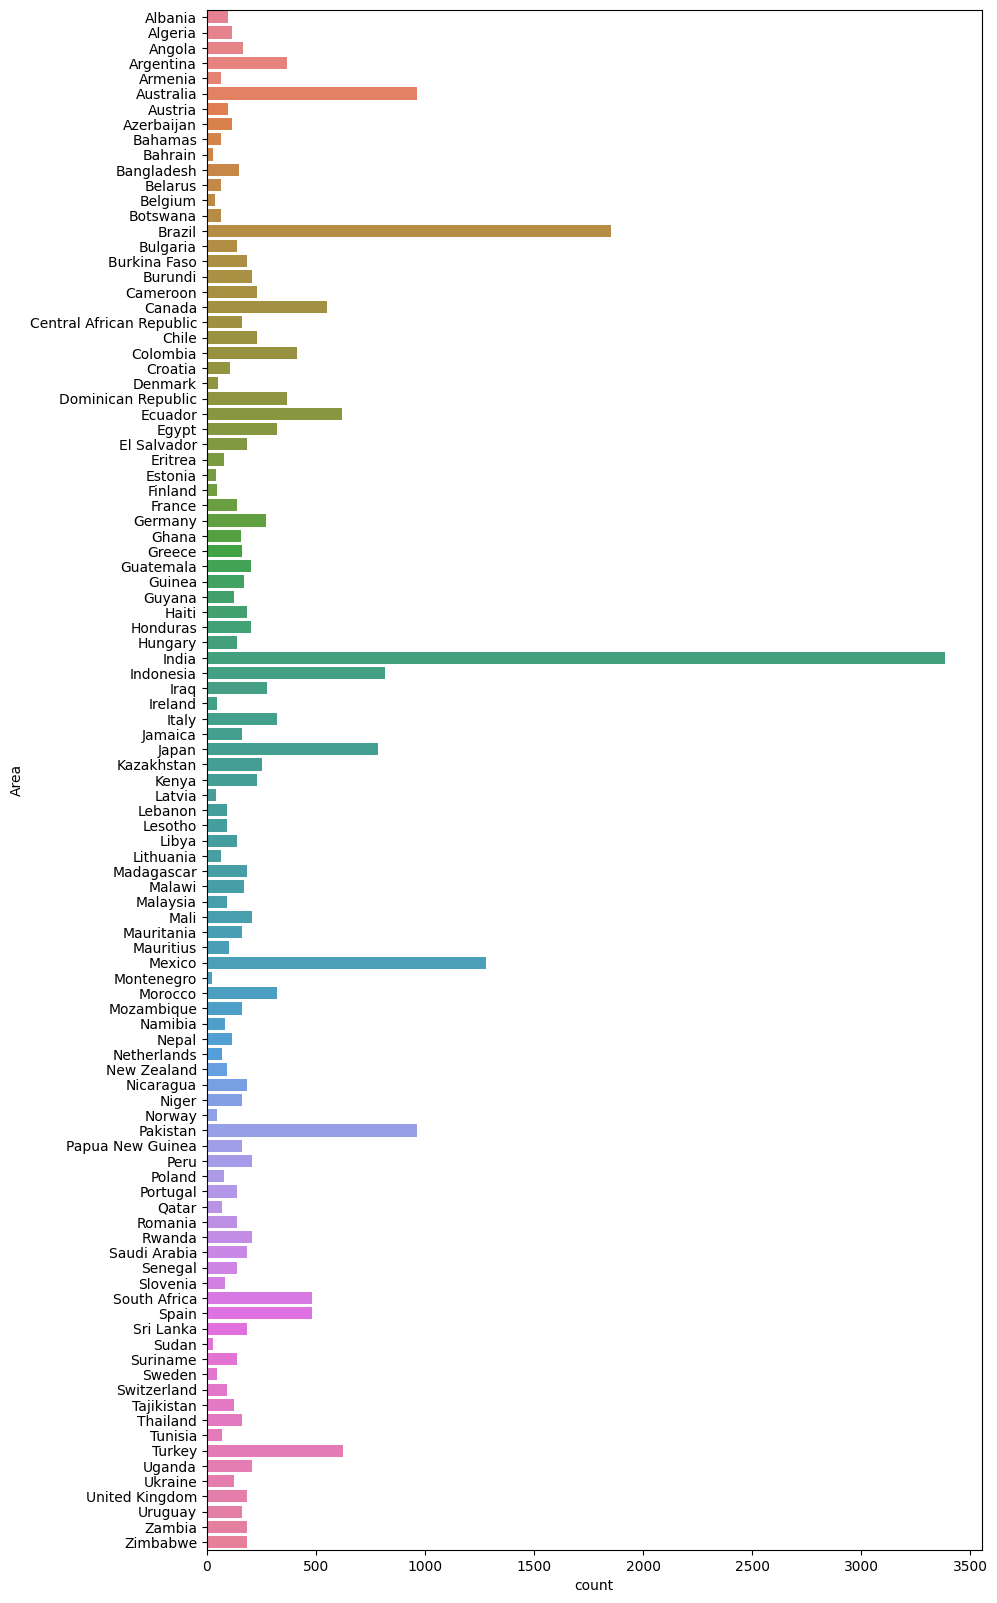

In [167]:
# Constructing a count plot
plt.figure(figsize=(10, 20))
sns.countplot(y=crop_df["Area"], hue=crop_df["Area"])

**Question 2: What are the sum yield per country?**

In [168]:
# Getting the countries without duplications
countries = crop_df["Area"].unique().tolist()
countries

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chile',
 'Colombia',
 'Croatia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Libya',
 'Lithuania',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Norway',
 'Pakistan',
 'Papua New Guinea',
 'Peru',
 'Poland',
 'Portugal',
 'Qatar',


In [169]:
# Gettting the sum of yield for each country
yield_per_country = []
for country in countries:
    yield_per_country.append(crop_df[crop_df["Area"] == country]["hg/ha_yield"].sum())
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

<Axes: >

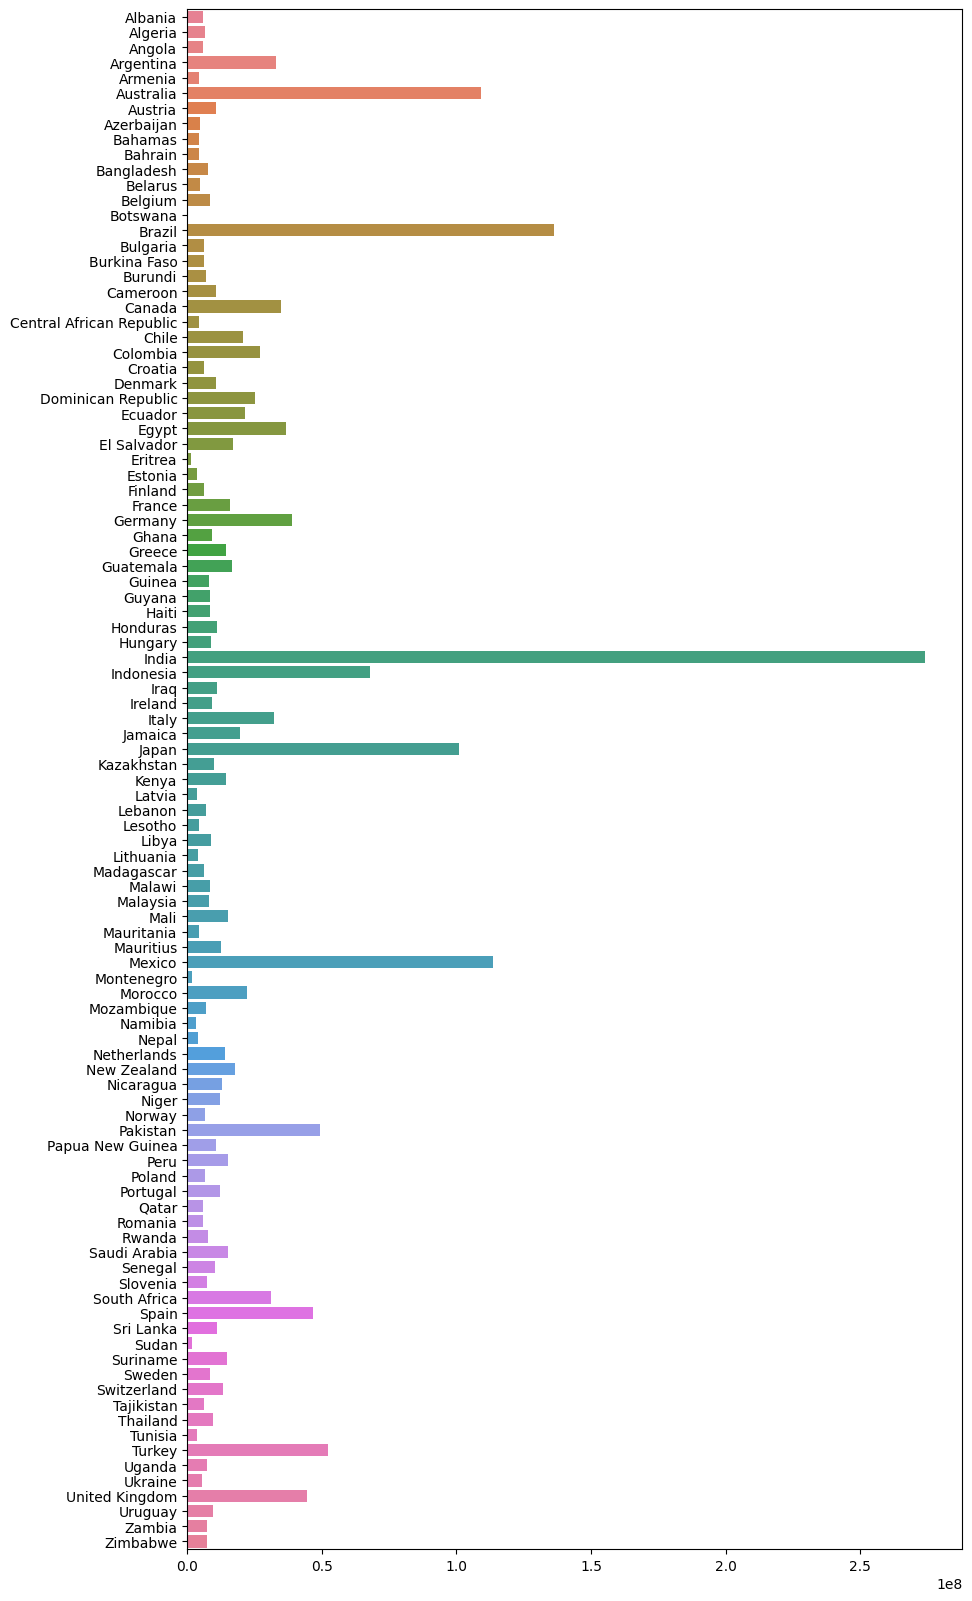

In [170]:
# Constructing a bar chart
plt.figure(figsize=(10, 20))
sns.barplot(y=countries, x=yield_per_country, hue=countries)

**Question 3: Which crop is the most cultivated?**

In [171]:
# Getting the crops planted 
crops = crop_df["Item"].value_counts().reset_index()
crops.columns = ["CROPS", "AMOUNT"]
crops

,CROPS,AMOUNT
0,Potatoes,3956
1,Maize,3824
2,Wheat,3539
3,"Rice, paddy",3091
4,Soybeans,2940
5,Sorghum,2770
6,Sweet potatoes,2593
7,Cassava,1889
8,Yams,774
9,Plantains and others,556


In [172]:
# Plotting a pie chart illustrating the amount of crops cultivated 
px.pie(crops, names="CROPS", values="AMOUNT", color="CROPS", title="Amount of crops cultivated")

In [173]:
px.bar(crops, x="AMOUNT", y="CROPS", title="Horizontal chart showing the amount of crops cultivated", color="CROPS")

In [174]:
crop_df["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013], dtype=int64)

**Question 4: What is the total yield per crop?**

In [175]:
# Putting the crops in a list
crop_list = crop_df["Item"].unique().tolist()
crop_list

['Maize',
 'Potatoes',
 'Rice, paddy',
 'Sorghum',
 'Soybeans',
 'Wheat',
 'Cassava',
 'Sweet potatoes',
 'Plantains and others',
 'Yams']

In [176]:
# Appending the total yield per crop
yield_per_crop = []
for crop in crop_list:
    yield_per_crop.append(crop_df[crop_df["Item"] == crop]["hg/ha_yield"].sum())
yield_per_crop

[142020761,
 785921609,
 127646024,
 52906376,
 49957039,
 106614786,
 275132269,
 310269345,
 58958974,
 86769760]

In [177]:
# Plotting the bar chart
px.bar(crop_df, x=crop_list, y=yield_per_crop, color=crop_list, title="Total yield per crop")

**Feature Scaling: Converting Categorical variables to Numerical and Scaling the values**

In [178]:
# Importing dependencies 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [179]:
# Separating the data into features and target
X = crop_df.drop(columns="hg/ha_yield", axis=1) # Features
Y = crop_df["hg/ha_yield"] # Target  

In [180]:
X

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,1485.0,121.00,16.37
1,Albania,Potatoes,1990,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,1485.0,121.00,16.37
3,Albania,Sorghum,1990,1485.0,121.00,16.37
4,Albania,Soybeans,1990,1485.0,121.00,16.37
...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,657.0,2550.07,19.76


In [181]:
# list(X.columns)
X.columns

Index(['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [182]:
# Splitting the data into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [183]:
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
19647,Mexico,Sorghum,2000,758.0,34468.93,16.11


In [184]:
print(X.shape, X_train.shape, X_test.shape)

(25932, 6) (20745, 6) (5187, 6)


In [185]:
# Identifying all categorical columns
categorical_col = X.select_dtypes(include=["object"]).columns.tolist()
# categorical_col

# Identifying all numerical columns
numeric_col = X.select_dtypes(include=["number"]).columns.tolist()
# numeric_col

scaler = StandardScaler()
encoder = OneHotEncoder(drop="first", sparse_output=False)

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler", scaler, numeric_col),
        ("OneHotEncoder", encoder, categorical_col)
    ],
    remainder="passthrough"
)

In [186]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp']),
                                ('OneHotEncoder',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['Area', 'Item'])])

In [187]:
# X_train_dummy = preprocessor.fit_transform(X_train)
# X_test_dummy = preprocessor.fit_transform(X_test)

In [188]:
len(Y)

25932

**Model Training**

In [189]:
# Importing models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [190]:
# Training the models
models = [LinearRegression(), Lasso(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor()]

In [191]:
for model in models:
    # Creating a pipeline for the models
    pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", model)
])
    pipeline.fit(X_train, Y_train)
    Y_pred = pipeline.predict(X_test)
    
    # Applying metrics
    print(f"{model}\nMean Absolute Error: {metrics.mean_absolute_error(Y_test, Y_pred)}\nR^2 score: {(metrics.r2_score(Y_test, Y_pred))}\n")

LinearRegression()
Mean Absolute Error: 29118.5700255033
R^2 score: 0.7442614180296974



c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+11, tolerance: 1.498e+10



Lasso()
Mean Absolute Error: 29106.003257130546
R^2 score: 0.74426744632038

Ridge()
Mean Absolute Error: 29069.666114561885
R^2 score: 0.7443202055184039

KNeighborsRegressor()
Mean Absolute Error: 4468.273838442259
R^2 score: 0.9832852331936288

DecisionTreeRegressor()
Mean Absolute Error: 3812.385772122614
R^2 score: 0.977622194697751



**Model Selection**

In [192]:
# Using KNN since it is the model with the best performance among other models

model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

In [193]:
# Visualize pipeline
from sklearn import set_config

set_config(display="diagram")

In [194]:
model_pipeline.fit(X, Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('StandardScaler',
                                                  StandardScaler(),
                                                  ['Year',
                                                   'average_rain_fall_mm_per_year',
                                                   'pesticides_tonnes',
                                                   'avg_temp']),
                                                 ('OneHotEncoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Area', 'Item'])])),
                ('model', KNeighborsRegressor(n_neighbors=1))])

**Making a Predictive System**

In [197]:
# Define input data
input_data = ("Albania","Maize",1990,1485.0,121.0,16.37)

# # Converting to a pandas dataframe
input_df = pd.DataFrame([input_data], columns=X.columns)

# # Applying the preprocessor
# processed_input = preprocessor.transform(input_df)

# # Converting to numpy array
# np_input_data = np.asarray(processed_input)

# # Reshaping the input data (to a 2D array) as an instance
# reshape_input_data = np_input_data.reshape(1, -1)

# Making predictions
pred = model_pipeline.predict(input_df)
print(pred[0])

36613.0


**Saving the preprocessor and trained model**

In [198]:
# Using joblib to save the preprocessor and trained model
import joblib

# Saving the preprocessor as a file
# preprocessor_file = "preprocessor.pkl"
# joblib.dump(preprocessor, preprocessor_file)

# Saving the model(pipeline) as a file
model_file = "crop_prediction.pkl"
joblib.dump(model_pipeline, model_file)

['crop_prediction.pkl']

In [ ]:
# Save the column names
import joblib
# joblib.dump(list(X.columns), 'columns.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')

['columns.pkl']